In [63]:
K_FOR_CORR = 25
ROUND_DENSITY_REG=4

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
# read csv to df:
path_to_csv = '/home/itay.nakash/smooth_language/results/SameInedx700000.csv'
df = pd.read_csv(path_to_csv)
df = df.drop('Unnamed: 0',axis=1)
numeric_df = df.select_dtypes(include=["number"])

/tmp/ipykernel_11241/2245289396.py:9: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_to_csv)


In [65]:
mask= (df['sim'] < 0.9) & (df['layer'] == 0)
bad_rows=df.loc[mask]

# get the row numbers:
indexses=bad_rows.index
print(len(indexses))
to_drop=[]
for index in indexses:
    to_drop+=[index+i for i in range(13)]
df=df.drop(index=to_drop)

139


In [66]:
def show_all_cols(df):
    num_in_line=5
    for i,col in enumerate(df):
        if i%num_in_line==num_in_line-1:
            print(col)
        else:
            print(col,end=",  ")
show_all_cols(df)

sen1,  sen2,  sen_len1,  sen_len2,  word1
word2,  index1,  index2,  layer,  n_exampels
sim,  sim_lmghead,  std,  correct1,  correct1_cl
correct1_cl_no_norm,  correct2,  correct2_cl,  correct2_cl_no_norm,  bertscore_nm_r
bertscore_nm_p,  bertscore_nm_f1,  bertscore_m_r,  bertscore_m_p,  bertscore_m_f1
logits1_masked,  logits1_pred,  softmax1_masked,  softmax1_pred,  logits2_masked
logits2_pred,  softmax2_masked,  softmax2_pred,  logits1_masked_no_norm,  logits1_pred_no_norm
softmax1_masked_no_norm,  softmax1_pred_no_norm,  logits2_masked_no_norm,  logits2_pred_no_norm,  softmax2_masked_no_norm
softmax2_pred_no_norm,  logits1_masked_cl,  logits1_pred_cl,  softmax1_masked_cl,  softmax1_pred_cl
logits2_masked_cl,  logits2_pred_cl,  softmax2_masked_cl,  softmax2_pred_cl,  logits1_masked_cl_no_norm
logits1_pred_cl_no_norm,  softmax1_masked_cl_no_norm,  softmax1_pred_cl_no_norm,  logits2_masked_cl_no_norm,  logits2_pred_cl_no_norm
softmax2_masked_cl_no_norm,  softmax2_pred_cl_no_norm,  predic

In [67]:
def check_corr_for_col(df,target:str,num_of_col_toshow:int):
    # calculate corr matrix:
    corr_matrix = df.corr()

    # get the correlation matrix of the similarity feature:
    corr_matrix_sim=corr_matrix[target]

    # get the top_k by abs that corelate to the similarity:
    largest_abs_values = corr_matrix_sim.abs().nlargest(num_of_col_toshow)
    k_largest_values = corr_matrix_sim.loc[largest_abs_values.index]
    print(k_largest_values)

In [68]:
check_corr_for_col(numeric_df,'sim',K_FOR_CORR)

sim                          1.000000
sim_lmghead                  0.855003
layer                       -0.766547
logits1_pred_cl             -0.672800
logits2_pred_cl             -0.670504
logits1_masked_cl           -0.578546
logits2_masked_cl           -0.567439
softmax1_pred_cl            -0.434719
softmax2_pred_cl            -0.434131
softmax1_masked_cl          -0.311995
softmax2_masked_cl          -0.305801
logits2_pred_cl_no_norm     -0.272838
logits1_pred_cl_no_norm     -0.271073
logits1_masked_cl_no_norm   -0.254557
logits2_masked_cl_no_norm   -0.253506
correct1_cl                 -0.243674
correct2_cl                 -0.238387
bertscore_m_f1               0.092761
bertscore_m_p                0.085489
bertscore_m_r                0.083696
softmax2_pred_cl_no_norm    -0.068051
softmax1_pred_cl_no_norm    -0.061556
logits1_pred                -0.059561
logits2_pred                -0.053638
softmax1_pred               -0.043048
Name: sim, dtype: float64


In [69]:
# why here I have a negetive corr to the similarity?
check_corr_for_col(df,'softmax1_masked_cl',K_FOR_CORR)

softmax1_masked_cl            1.000000
correct1_cl                   0.863895
softmax1_pred_cl              0.702851
logits1_masked_cl             0.683391
logits1_pred_cl               0.568122
layer                         0.428421
softmax1_masked               0.400959
logits2_pred_cl               0.400920
logits2_masked_cl             0.380401
softmax2_pred_cl              0.378342
softmax2_masked_cl            0.344633
logits1_masked                0.344313
correct1                      0.339184
sim                          -0.316087
softmax1_pred                 0.302308
logits1_pred                  0.295408
correct2_cl                   0.278854
logits1_masked_cl_no_norm     0.260724
sim_lmghead                  -0.179227
logits2_masked_cl_no_norm     0.125611
logits1_pred_cl_no_norm       0.116149
logits1_masked_no_norm        0.110270
logits2_pred_cl_no_norm       0.110216
softmax1_masked_cl_no_norm    0.083175
softmax2_pred                 0.066463
Name: softmax1_masked_cl,

In [70]:
def print_reg_weights(df,model,target:str):  
    x = df.drop(target,axis=1)
    y = df[target]
    # Fit the regressor to the data
    model.fit(x, y)

    # Print the sorted weights and their corresponding column names
    weights = sorted(zip(numeric_df.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True)
    for col, weight in weights:
        print(f"col: {col}, weight: {round(weight,ROUND_DENSITY_REG)} ")

In [71]:
linearRegg=LinearRegression()
print_reg_weights(numeric_df,linearRegg,'sim')

col: index1, weight: 89700318.6633 
col: index2, weight: -89700318.6632 
col: sim_lmghead, weight: 1008398.3433 
col: correct2_cl, weight: 742862.5921 
col: n_exampels, weight: 712816.1631 
col: correct1_cl, weight: -23479.1398 
col: logits1_pred_cl_no_norm, weight: -14.0028 
col: logits1_pred_no_norm, weight: -13.5974 
col: logits2_pred_no_norm, weight: -7.6565 
col: logits2_pred_cl_no_norm, weight: -5.8352 
col: bertscore_m_p, weight: -1.481 
col: bertscore_m_r, weight: 0.8071 
col: bertscore_nm_f1, weight: 0.7986 
col: bertscore_nm_p, weight: 0.4166 
col: sim, weight: 0.217 
col: bertscore_nm_r, weight: -0.2112 
col: correct2_cl_no_norm, weight: -0.207 
col: softmax2_masked_cl_no_norm, weight: -0.1378 
col: softmax1_masked_cl_no_norm, weight: -0.1325 
col: softmax1_masked_no_norm, weight: 0.0999 
col: softmax2_masked_no_norm, weight: 0.084 
col: softmax2_masked, weight: 0.0153 
col: logits1_pred_cl, weight: -0.0149 
col: logits2_pred_cl, weight: -0.0147 
col: softmax1_masked, weight

In [72]:
# currently zero, maybe change regulation. but I guess it say its hard to predict the sim by those features.
lasso=Lasso()
print_reg_weights(numeric_df,lasso,'sim')

col: sen_len1, weight: -0.0 
col: sen_len2, weight: -0.0 
col: index1, weight: -0.0 
col: index2, weight: -0.0 
col: layer, weight: -0.0 
col: n_exampels, weight: 0.0 
col: sim, weight: 0.0 
col: sim_lmghead, weight: 0.0 
col: std, weight: -0.0 
col: correct1, weight: -0.0 
col: correct1_cl, weight: 0.0 
col: correct1_cl_no_norm, weight: -0.0 
col: correct2, weight: -0.0 
col: correct2_cl, weight: 0.0 
col: correct2_cl_no_norm, weight: -0.0 
col: bertscore_nm_r, weight: -0.0 
col: bertscore_nm_p, weight: -0.0 
col: bertscore_nm_f1, weight: 0.0 
col: bertscore_m_r, weight: 0.0 
col: bertscore_m_p, weight: 0.0 
col: bertscore_m_f1, weight: -0.0 
col: logits1_masked, weight: -0.0 
col: logits1_pred, weight: -0.0 
col: softmax1_masked, weight: -0.0 
col: softmax1_pred, weight: -0.0 
col: logits2_masked, weight: -0.0 
col: logits2_pred, weight: -0.0 
col: softmax2_masked, weight: -0.0 
col: softmax2_pred, weight: 0.0 
col: logits1_masked_no_norm, weight: -0.0 
col: logits1_pred_no_norm, wei

<AxesSubplot:xlabel='softmax1_masked_cl', ylabel='sim'>

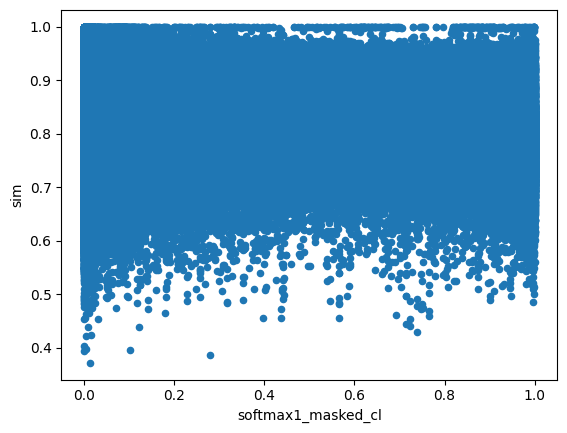

In [73]:
df.plot.scatter(x='softmax1_masked_cl',y='sim', cmap='viridis')

<AxesSubplot:xlabel='layer', ylabel='sim'>

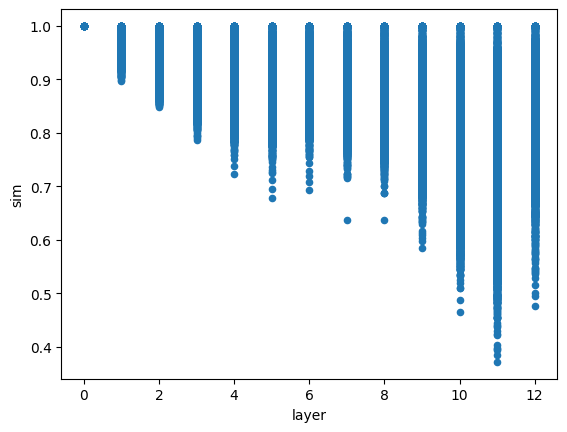

In [74]:
# TODO: remove all "mistakes" (few examples where the sim is not 1 in layer 0)

# thats a bit weird? why there are strict holes in spesific layers? there isn't any real pattern I think,
# so I'm not sure if its meaningful, but maybe can show how 'dicotomic' the model is in different layers?
df.plot.scatter(x='layer',y='sim', cmap='viridis')

In [75]:
def plot_mean_of_two_cols(df,x_str:str,y_str:str):
    mean_y_by_x = df.groupby(x_str)[y_str].mean()

    ax= mean_y_by_x.plot(x=x_str,y=y_str,kind='line')

    ax.set_ylabel(y_str)
    ax.set_xlabel(x_str)
    plt.show()

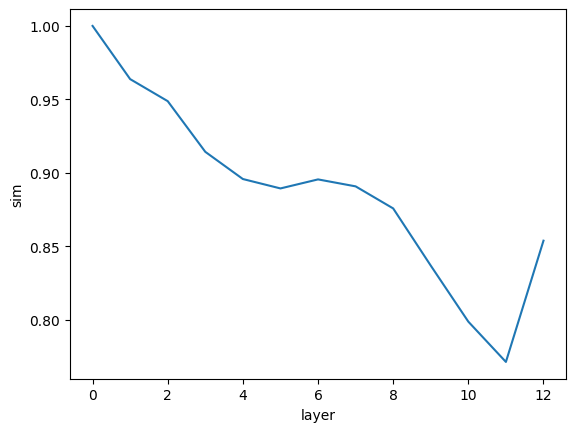

In [76]:
plot_mean_of_two_cols(df,x_str='layer',y_str='sim')

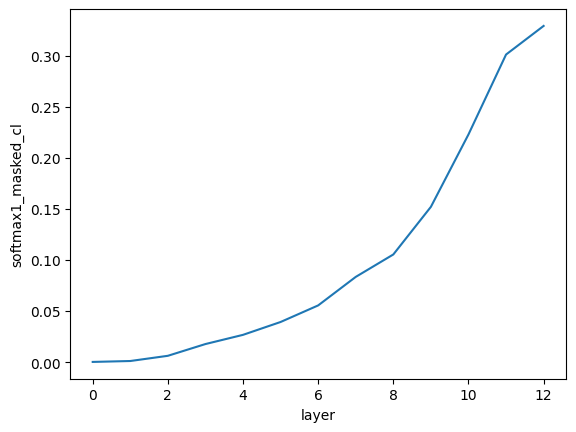

In [77]:
plot_mean_of_two_cols(df,x_str='layer',y_str='softmax1_masked_cl')

In [78]:
#similar results:
#df_pred1_incorrect=df[df['correct1']==0]
#plot_mean_of_two_cols(df_pred1_incorrect,x_str='layer',y_str='softmax1_pred_cl')

<AxesSubplot:xlabel='bertscore_m_f1', ylabel='sim'>

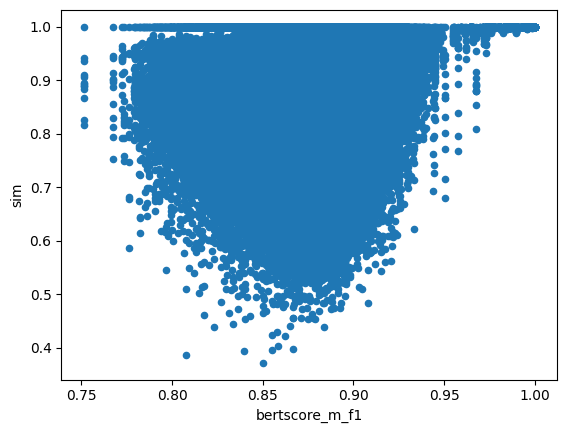

In [79]:
df.plot.scatter(x='bertscore_m_f1',y='sim', cmap='viridis')

In [80]:
def createHeatMap(x,y):
    plt.hexbin(x,y)
    # Add a colorbar
    plt.colorbar()

    # Show the plot
    plt.show()

def corrHeatmap(df):
    # too many features, not informative:
    corr_matrix = df.corr()
    # Create a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f")

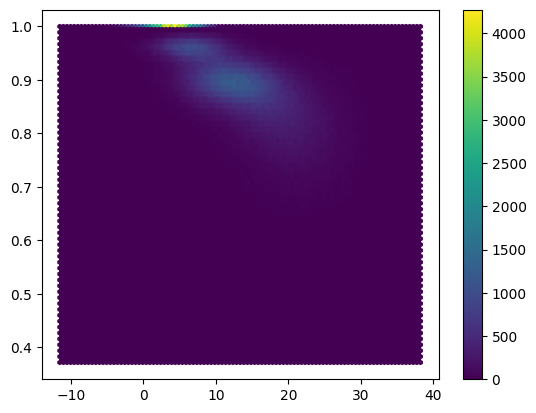

In [81]:
x=df['logits1_pred_cl']
y=df['sim']
createHeatMap(x,y)

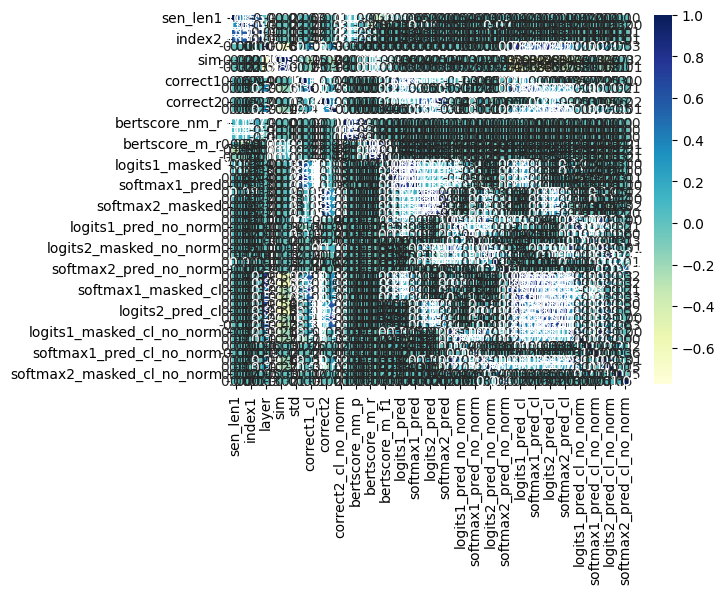

In [82]:
corrHeatmap(df)